<a href="https://colab.research.google.com/github/DaheePark0415/Econ512-Fall2024/blob/main/RDD_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plot and data saved successfully.


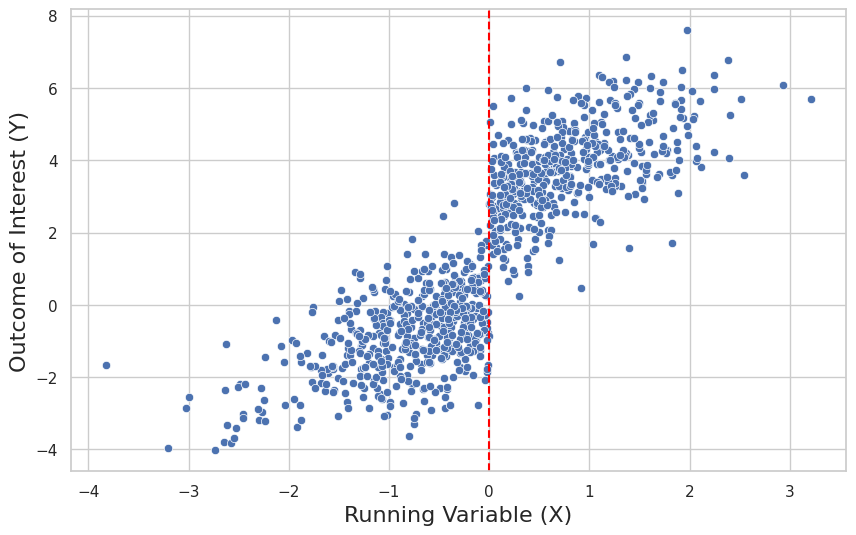

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#######################################################################
## This is a script for simulating the regression discontinuity model
#######################################################################

# Given parameters
cutoff_parameter = 0.0
beta_treatment_effect = 3.0
N_sample_size = 1000

# Simulate the heterogeneous primitives
X_running_variable = np.random.normal(loc=0, scale=1, size=N_sample_size)
epsilon_outcome_unobservable = X_running_variable + np.random.normal(loc=0, scale=1, size=N_sample_size)

# Assign the treated group
D_treatment = X_running_variable >= cutoff_parameter
Y_outcome_of_interest = beta_treatment_effect * D_treatment + epsilon_outcome_unobservable

# Combine the variables into a DataFrame (similar to data.table in R)
the_data_set = pd.DataFrame({
    'Y_outcome_of_interest': Y_outcome_of_interest,
    'D_treatment': D_treatment,
    'X_running_variable': X_running_variable
})

# Plot the data: X_running_variable on the x-axis and Y_outcome_of_interest on the y-axis
sns.set_theme(style="whitegrid", rc={"axes.labelsize": 16})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='X_running_variable', y='Y_outcome_of_interest', data=the_data_set)

# Add the vertical line at the cutoff parameter
plt.axvline(x=cutoff_parameter, color='red', linestyle='--')

# Add labels
plt.xlabel("Running Variable (X)")
plt.ylabel("Outcome of Interest (Y)")

# Save the plot as a PDF
plt.savefig('RDD_simulator.pdf', format='pdf', bbox_inches='tight')

# Save the dataset as a CSV file
the_data_set.to_csv('RDD_simulator_data.csv', index=False)

print("Plot and data saved successfully.")


In [6]:
import pandas as pd
import numpy as np

#######################################################################
## This is a script for estimating the regression discontinuity model
#######################################################################

# Clear memory (not needed in Python, but you can restart your environment if necessary)

# Load the data
the_data_set = pd.read_csv("RDD_simulator_data.csv")

# Define the RDD estimator with simple threshold around cutoff
def RDD_estimator_simple(inputdata, c_threshold_point=0, tau_bandwidth=0.5):
    # Find those observations just above the threshold
    meanY_above = inputdata[
        (inputdata['X_running_variable'] >= c_threshold_point) &
        (inputdata['X_running_variable'] <= c_threshold_point + tau_bandwidth)
    ]['Y_outcome_of_interest'].mean()

    # Find those observations just below the threshold
    meanY_below = inputdata[
        (inputdata['X_running_variable'] <= c_threshold_point) &
        (inputdata['X_running_variable'] >= c_threshold_point - tau_bandwidth)
    ]['Y_outcome_of_interest'].mean()

    # Estimate the treatment effect
    RDD_beta_hat = meanY_above - meanY_below

    return RDD_beta_hat

# Example usage of the function
RDD_estimate = RDD_estimator_simple(the_data_set, c_threshold_point=0, tau_bandwidth=0.5)
print(f"Estimated RDD treatment effect: {RDD_estimate}")


Estimated RDD treatment effect: 3.372041979243847


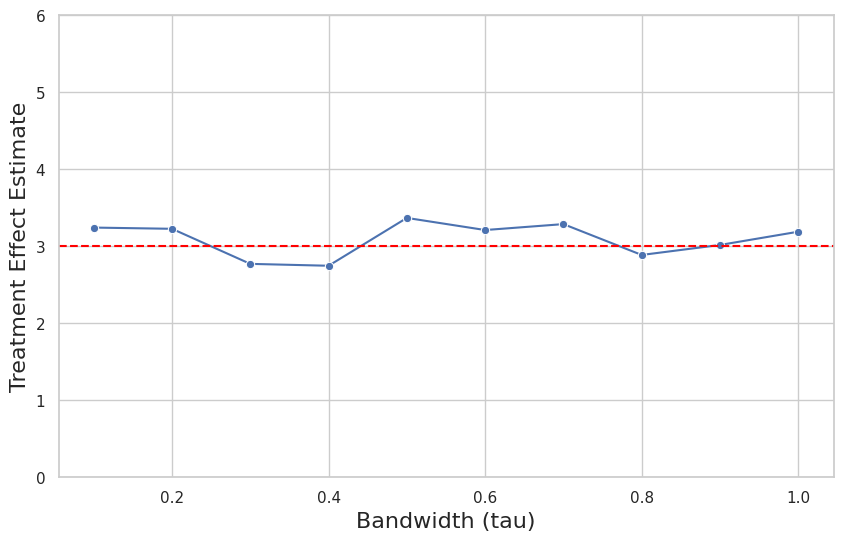

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the 'thresholds' and 'results' arrays already computed
thresholds = np.linspace(0.1, 1.0, 10)  # Example thresholds (you can replace with your actual values)
results = np.random.uniform(2.5, 3.5, size=10)  # Example results (you can replace with your actual values)

# Combine thresholds and results into a DataFrame
data = pd.DataFrame({'thresholds': thresholds, 'results': results})

# Set the seaborn theme and plot settings
sns.set_theme(style="whitegrid", rc={"axes.labelsize": 16})

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='thresholds', y='results', data=data, marker="o")

# Add the horizontal line at 3.0
plt.axhline(y=3.0, color='red', linestyle='--')

# Add labels and limits
plt.xlabel("Bandwidth (tau)")
plt.ylabel("Treatment Effect Estimate")
plt.ylim(0, 6)

# Save the plot as a PDF file
plt.savefig('RDD_estimator_simple.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
